In [18]:
import OSMPythonTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [17]:
data = pd.read_csv('311_Noise_Complaints.csv')


C:\Users\20123\AppData\Local\Temp\ipykernel_47048\1449329229.py:1: DtypeWarning: Columns (17,18,20,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('311_Noise_Complaints.csv')


In [18]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,22514285,01/13/2012 09:40:00 AM,01/18/2012 02:15:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Equipment (NC1),NaN,10463.0,2865 KINGSBRIDGE TERRACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.874317,-73.902631,"(40.87431709464755, -73.90263084439134)"
1,22514290,01/13/2012 11:11:00 AM,01/19/2012 11:00:00 AM,DEP,Department of Environmental Protection,Noise,Noise: Construction Equipment (NC1),NaN,11224.0,2944 WEST 5 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577537,-73.972562,"(40.5775372139104, -73.97256202313267)"
2,22514316,01/13/2012 03:50:47 AM,01/13/2012 07:48:50 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11207.0,264 HENDRIX STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675724,-73.890162,"(40.67572408087868, -73.8901621932881)"
3,22514360,01/13/2012 04:46:36 AM,01/13/2012 07:27:12 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11429.0,104-01 216 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.712013,-73.742413,"(40.71201295540622, -73.74241286920541)"
4,22514373,01/13/2012 05:43:33 AM,01/13/2012 06:53:43 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11217.0,99 LAFAYETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687250,-73.974168,"(40.68724950475265, -73.97416831783468)"


In [19]:
# check for missing values
data.isnull().sum()

Unique Key                              0
Created Date                            0
Closed Date                         66258
Agency                                  0
Agency Name                             0
Complaint Type                          0
Descriptor                              2
Location Type                      788049
Incident Zip                        13475
Incident Address                   410350
Street Name                        410443
Cross Street 1                     386729
Cross Street 2                     389127
Intersection Street 1             2980981
Intersection Street 2             2982445
Address Type                      1536164
City                               182661
Landmark                          3582105
Facility Type                     4260406
Status                                  0
Due Date                          4214875
Resolution Description              94938
Resolution Action Updated Date     105118
Community Board                   

In [20]:
data.shape

(6900790, 39)

In [27]:
# choose the data that 'Created Date' from 2020 till now
data['Created Date'] = pd.to_datetime(data['Created Date'])
# data['Closed Date'] = pd.to_datetime(data['Closed Date'])
# data['Resolution Action Updated Date'] = pd.to_datetime(data['Resolution Action Updated Date'])
# data['Due Date'] = pd.to_datetime(data['Due Date'])
data_new = data[data['Created Date'] >= '2020-01-01']
data_new.shape

(3495815, 39)

In [28]:
data_new.describe()

,Unique Key,Created Date,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude
count,3.495815e+06,3495815,3.494246e+06,3.478841e+06,3.479024e+06,0.0,0.0,0.0,0.0,0.0,0.0,3.478822e+06,3.478822e+06
mean,5.376650e+07,2022-04-23 02:48:49.132390656,1.069841e+04,1.006749e+06,2.166500e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.076128e+01,-7.391876e+01
min,4.315386e+07,2020-01-01 00:01:37,8.300000e+01,9.133530e+05,1.210020e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.049854e+01,-7.425495e+01
25%,4.987308e+07,2021-02-26 00:47:02,1.004000e+04,9.958720e+05,1.914810e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.069218e+01,-7.395808e+01
50%,5.400118e+07,2022-04-25 01:13:27,1.046600e+04,1.005740e+06,2.155310e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.075815e+01,-7.392242e+01
75%,5.795470e+07,2023-06-20 17:47:14,1.122500e+04,1.019138e+06,2.442120e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.083694e+01,-7.387403e+01
max,6.244480e+07,2024-09-15 01:51:14,1.234500e+04,1.067178e+06,2.720890e+05,NaN,NaN,NaN,NaN,NaN,NaN,4.091346e+01,-7.370074e+01
std,4.985278e+06,NaN,5.417412e+02,1.812832e+04,3.112816e+04,NaN,NaN,NaN,NaN,NaN,NaN,8.543830e-02,6.541018e-02


In [29]:
columns_with_nan_values=data_new.isnull().sum()
size = data_new.shape[0]
remove = []
for key,value in columns_with_nan_values.items():
    # print(key,value)
    k = value/size
    # print(k,key)
    if (value/size) > 0.5:
        remove.append(key)
df = data_new.drop(labels=remove, axis=1)

In [30]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location
2748739,43153862,2020-04-29 14:48:22,04/29/2020 03:04:06 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,NaN,...,04/29/2020 03:04:08 PM,0 Unspecified,Unspecified,NaN,NaN,Claremont Park,Unspecified,NaN,NaN,NaN
2748740,43153863,2020-04-29 14:48:28,04/29/2020 03:04:11 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,NaN,...,04/29/2020 03:04:13 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
2750389,43159049,2020-04-29 14:48:19,04/29/2020 03:04:05 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,NaN,...,04/29/2020 03:04:08 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN
2750916,43160714,2020-04-29 14:48:26,04/29/2020 03:04:09 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,613 GRAND CONCOURSE,...,04/29/2020 03:04:13 PM,Unspecified BRONX,BRONX,NaN,NaN,Franz Sigel Park,BRONX,NaN,NaN,NaN
2750917,43160715,2020-04-29 14:48:29,04/29/2020 03:04:12 PM,NYPD,New York City Police Department,Noise - Park,Loud Music/Party,Park/Playground,NaN,NaN,...,04/29/2020 03:04:17 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,NaN,NaN,NaN


In [31]:
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%Y-%m-%d %H:%M:%S')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')

print(df.dtypes)

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Status                                    object
Resolution Description                    object
Resolution Action Up

In [32]:
# save the data to a new csv file
df.to_csv('311_Noise_Complaints_cleaned.csv', index=False)

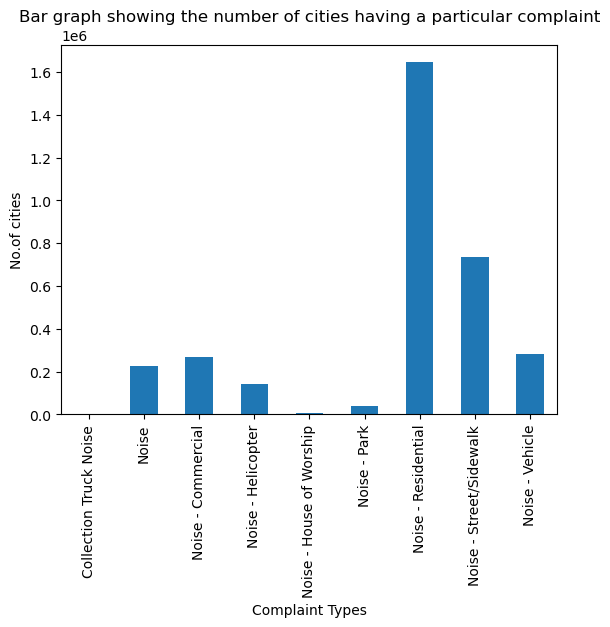

In [45]:
#Bar graph showing the number of cities having a particular complaint.
x=df.groupby('Complaint Type').City.count()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("No.of cities")
plt.title("Bar graph showing the number of cities having a particular complaint")
plt.show()

Complaint Type
Noise - Residential         1672288
Noise - Street/Sidewalk      812291
Noise - Vehicle              318904
Noise - Commercial           275250
Noise                        228495
Noise - Helicopter           141708
Noise - Park                  40092
Noise - House of Worship       6295
Collection Truck Noise          492
Name: count, dtype: int64


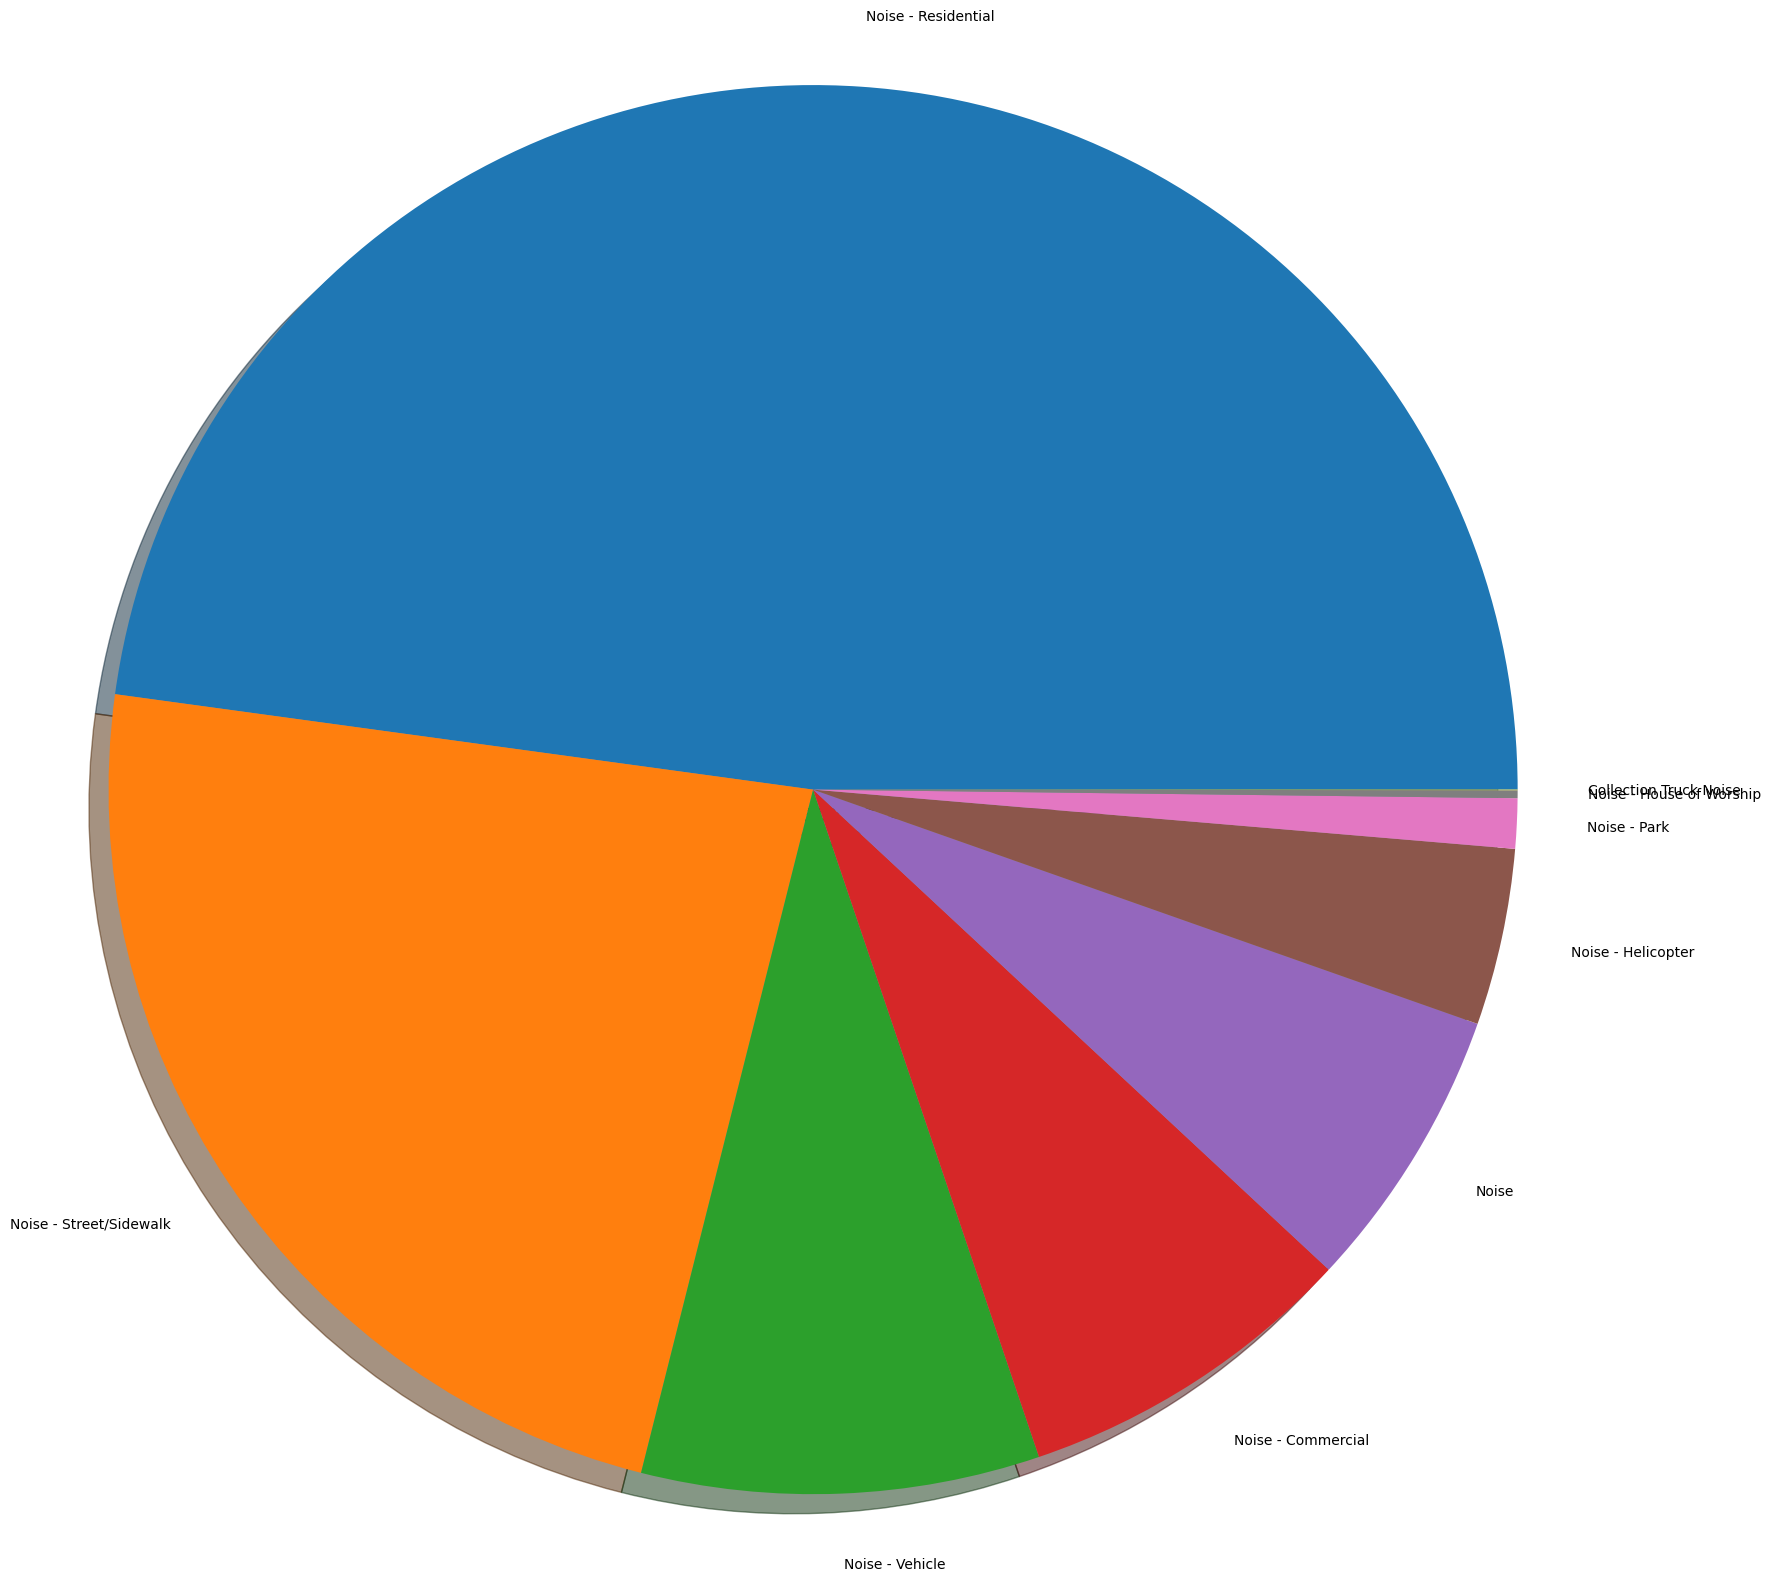

In [50]:
# Count of Complaints
x=df['Complaint Type'].value_counts()
print(x)
# Pie chart of Different compalints.
plt.figure(figsize=(20,20))
labels = x.keys()
sizes = x
# Plot
plt.pie(sizes,labels=labels,shadow=True)
 
plt.axis('equal')
plt.show()

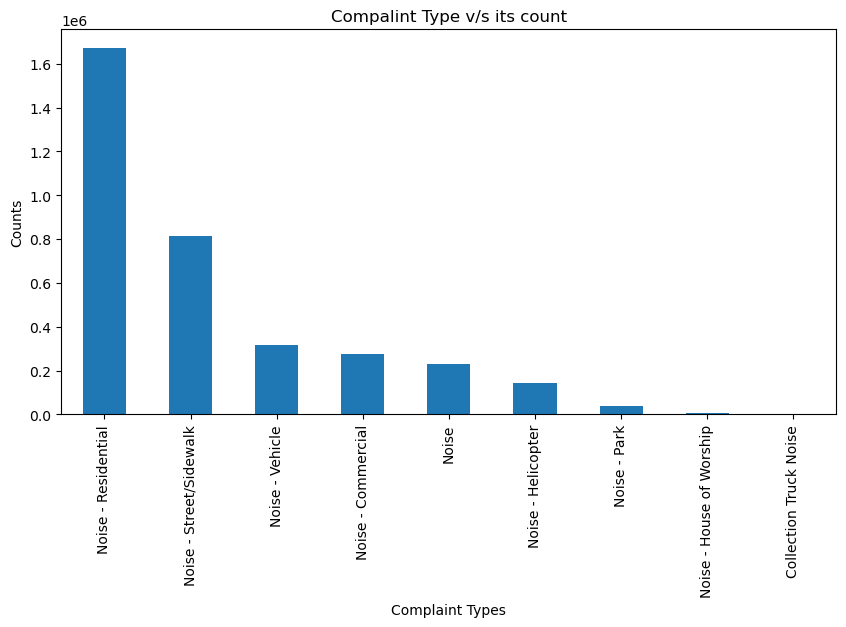

In [51]:
#Bar graph to show the compalint type and its count
plt.figure(figsize=(10,5))
x=df['Complaint Type'].value_counts()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("Counts")
plt.title("Compalint Type v/s its count")
plt.show()

In [52]:
#Count of complaint type in a citywise manner
df1=df.groupby('Complaint Type').City.count()
#printing the df1
print(df1)


Complaint Type
Collection Truck Noise          432
Noise                        228208
Noise - Commercial           266839
Noise - Helicopter           140169
Noise - House of Worship       5978
Noise - Park                  37251
Noise - Residential         1644355
Noise - Street/Sidewalk      735461
Noise - Vehicle              281946
Name: City, dtype: int64


In [53]:
#Display the complaint type and city together
df3=df[["City","Complaint Type"]]
print(df3)

             City           Complaint Type
2748739       NaN             Noise - Park
2748740       NaN             Noise - Park
2750389       NaN      Noise - Residential
2750916     Bronx             Noise - Park
2750917       NaN             Noise - Park
...           ...                      ...
6488674  BROOKLYN                    Noise
6488707  BROOKLYN                    Noise
6488722       NaN      Noise - Residential
6488760  BROOKLYN       Noise - Helicopter
6488770       NaN  Noise - Street/Sidewalk

[3495815 rows x 2 columns]


In [54]:
#Find the top 10 complaint types
x=df['Complaint Type'].value_counts()
print(x.head(10))

Complaint Type
Noise - Residential         1672288
Noise - Street/Sidewalk      812291
Noise - Vehicle              318904
Noise - Commercial           275250
Noise                        228495
Noise - Helicopter           141708
Noise - Park                  40092
Noise - House of Worship       6295
Collection Truck Noise          492
Name: count, dtype: int64


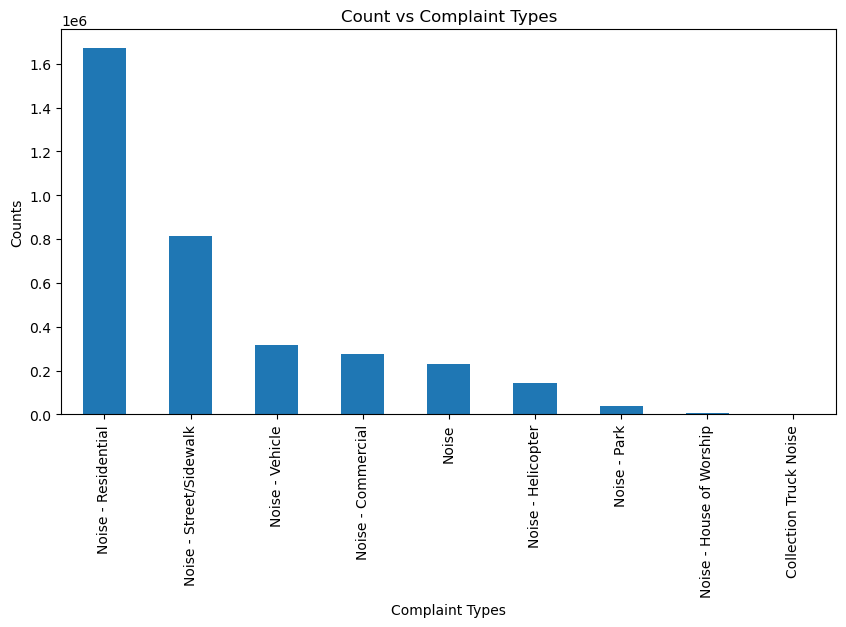

In [55]:
#Plot a bar graph of count vs complaint types
plt.figure(figsize=(10,5))
x=df['Complaint Type'].value_counts()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("Counts")
plt.title("Count vs Complaint Types")
plt.show()

In [9]:
df

NameError: name 'df' is not defined